# Juntando R y Python

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [6]:
rpy2.robjects.numpy2ri.activate()

In [4]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}

"""

In [5]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x000002C8A913BEC8 / R:0x000002C8A9769558>

In [6]:
saludar_py = ro.globalenv["saludar"]

In [7]:
res=saludar_py("Federico Paz Marinelli")
res[0]

'Hola,  Federico Paz Marinelli'

In [8]:
type(res)

rpy2.robjects.vectors.StrVector

In [9]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [10]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [11]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [13]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [14]:
ro.globalenv["var_to_r"] = var_from_python

In [15]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [16]:
ro.r("sum(var_to_r)")

array([118.])

In [17]:
ro.r("mean(var_to_r)")

array([2.95])

In [18]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [19]:
np.sum(var_from_python)

118.00000000000007

In [20]:
np.mean(var_from_python)

2.950000000000002

In [21]:
ro.r("hist(var_to_r)")

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x000002C89F932248 / R:0x000002C8A725DAC8>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002C8A97A6408 / R:0x000002C8A8353AE0>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x000002C8A914F088 / R:0x000002C8A98D4328>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002C8A914F588 / R:0x000002C8A7271DA0>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000002C8A914FA88 / R:0x000002C8A725D128>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000002C8A914F6C8 / R:0x000002C8A98DAD20>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x000002C89FF19A08 / R:0x000002C8A6C23E10>
[       1]

# Trabajar de forma conjunta entre R y Python

In [1]:
from rpy2.robjects.packages import importr

In [7]:
ro.r("install.packages('extRemes')")
extremes = importr("extRemes")

In [8]:
fevd = extremes.fevd

In [9]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x000001ADA75B4EF0 / R:0x000001ADA5362FC0>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [19]:
data = pd.read_csv("../data/datasets/time/time_series.txt", sep="\s+", skiprows = 1, parse_dates = [[0,1]], names = ["date", "time", "wind_speed"], index_col = 0)

In [20]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [21]:
data.shape

(275352, 1)

In [24]:
max_ws = data.wind_speed.groupby(pd.Grouper(freq="A")).max()

In [25]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

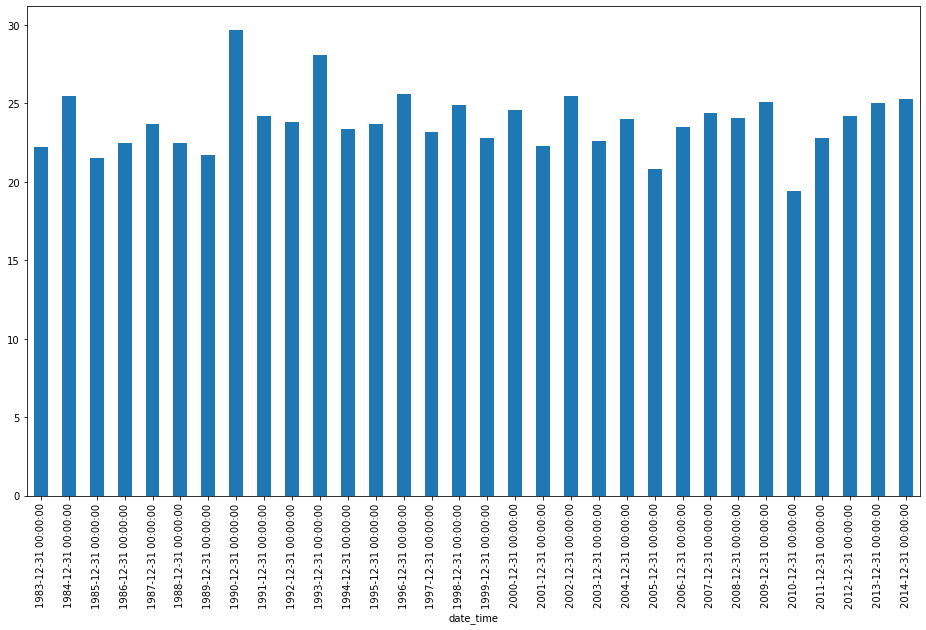

In [26]:
max_ws.plot(kind="bar", figsize=(16,9))

In [28]:
result = fevd(max_ws.values, type="GEV", method="GMLE")

In [29]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [30]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x000001ADB5DA70C8 / R:0x000001AD97C20778>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x000001ADB5D77448 / R:0x000001ADA5B52548>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x000001ADB5A7F788 / R:0x000001AD974D0A08>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x000001ADB5DB4948 / R:0x000001AD97391838>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x000001ADB5DC7A48 / R:0x000001AD974FE970>
[ 

In [32]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [33]:
res = result.rx("results")

In [34]:
print(res)

$results

$results$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$results$value

[1] 1e+16



$results$counts

function gradient 

       1        1 



$results$convergence

[1] 0



$results$message

NULL



$results$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$results$num.pars

$results$num.pars$location

[1] 1



$results$num.pars$scale

[1] 1



$results$num.pars$shape

[1] 1









In [36]:
loc, scale, shape = res[0].rx("par")[0]

In [37]:
loc

23.063941519915588

In [38]:
scale

1.7576912874286317

In [39]:
shape

-0.1628816367714792

# Función mágica para R

In [41]:
%load_ext rpy2.ipython

In [42]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [43]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [53]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)

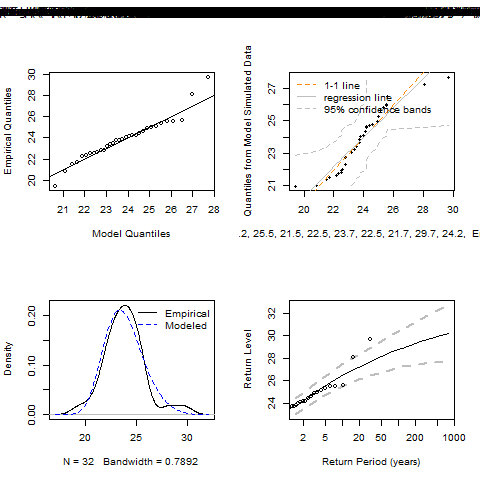

In [54]:
%R -i result plot.fevd(result)

# Un ejemplo complejo de R, Python y Rmagic

In [60]:
metodos = ["MLE", "GMLE"]
tipos = ["GEV", "Gumbel"]

Tipo de Ajuste:  GEV
Método del ajuste:  MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







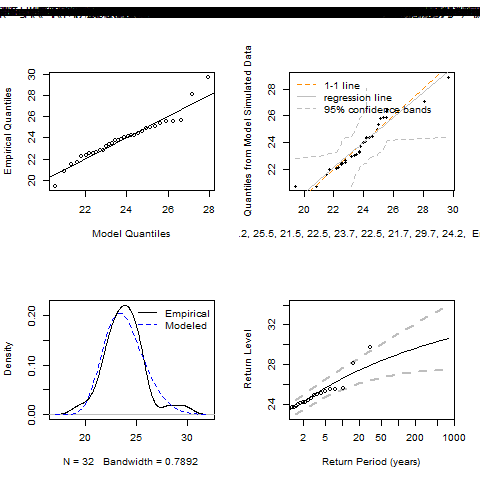

Tipo de Ajuste:  GEV
Método del ajuste:  GMLE
$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







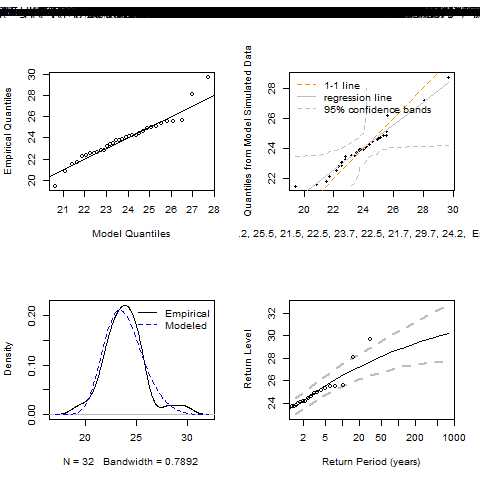

Tipo de Ajuste:  Gumbel
Método del ajuste:  MLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







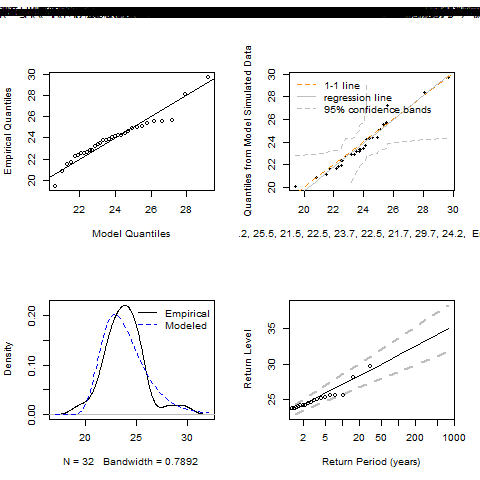

Tipo de Ajuste:  Gumbel
Método del ajuste:  GMLE
$par

 location     scale 

22.905876  1.814452 



$value

[1] 67.38487



$counts

function gradient 

      14        5 



$convergence

[1] 0



$message

NULL



$hessian

          location     scale

location  9.719762 -4.762621

scale    -4.762621 21.535378



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

NULL







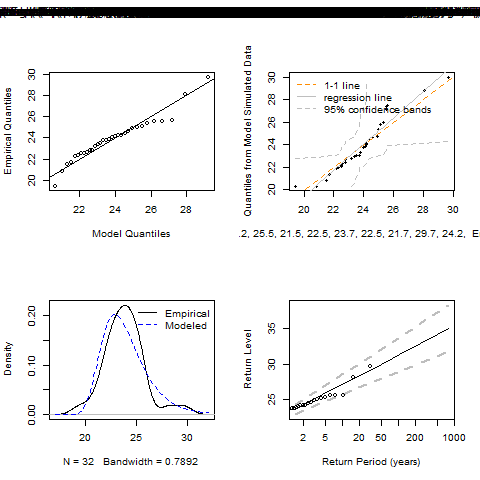

In [61]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Método del ajuste: ", m)
        result = fevd(max_ws.values, method=m, type=t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)